In [25]:
%pylab inline 
%load_ext autoreload
%autoreload 2
import pickle
import numpy as np
import jax
import jax_cosmo as jc
import jax.numpy as np
cosmo = jc.Planck15()
from DifferentiableHOS.Plot import plot_contours

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
results_dict = pickle.load( open( "/Users/dl264294/Desktop/github/DifferentiableHOS/scripts/results.pkl", "rb" ) )

In [27]:
ps_array=[]
jac_array=[]
for i in (range(79)):
    results_dict = pickle.load( open( "/Users/dl264294/Desktop/github/DifferentiableHOS/scripts/file32/results"+str(i)+".pkl", "rb" ) )
    ps=results_dict['ps']
    jac=results_dict['jac']
    ps_array.append(ps)
    jac_array.append(jac)
ell=results_dict['ell']

In [24]:
ps_mean


DeviceArray([3.6478486e-05, 1.3118978e-08, 5.8947700e-09, 3.0891285e-09,
             2.0216480e-09, 1.5199045e-09, 1.2126039e-09, 9.8575159e-10,
             7.6849138e-10, 6.5910855e-10, 5.5392502e-10, 5.1290450e-10,
             4.5533372e-10, 3.9036205e-10, 3.5685263e-10, 3.2203218e-10],            dtype=float32)

In [4]:
ps_mean=np.mean(np.stack(ps_array),axis=0)
jac_mean=np.mean(np.stack(jac_array),axis=0)

In [5]:
z = linspace(0,2,100)
pz = zeros_like(z)
pz[50] =1. 
nzs_s=jc.redshift.kde_nz(z, pz, bw=0.05)
# let's draw the nz on a new array of redshifts
zsamp = np.linspace(0,2,128)
nzs = [nzs_s]
probes = [ jc.probes.WeakLensing(nzs, sigma_e=0.26) ]
cls = jc.angular_cl.angular_cl(cosmo, ell, probes)


# we compute the covariance matrix using the tools from the Jax module
mu, cov = jc.angular_cl.gaussian_cl_covariance_and_mean(cosmo, ell, probes,f_sky=25/41252, sparse=True);

/Users/dl264294/.local/lib/python3.8/site-packages/jax/_src/lax/lax.py:6081: UserWarning: Explicitly requested dtype <class 'jax._src.numpy.lax_numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))


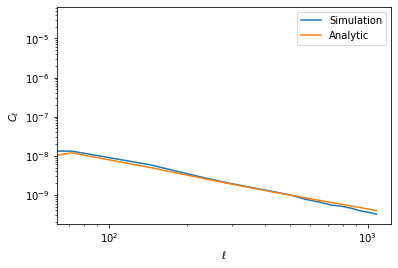

In [6]:
#We compare the theoretical power spectrum with the mean power spectrum obtained from 10 simulations
loglog(ell,  ps_mean, label='Simulation')
loglog(ell, mu, label='Analytic')
xlabel('$\ell$')
ylabel('$C_{\ell}$')
legend()

In [8]:
def mean_fn(p):
  cosmo = jc.Planck15(Omega_c=p[0], sigma8=p[1])
  # Compute signal vector
  m = jc.angular_cl.angular_cl(cosmo, ell, probes)
  return m.flatten()
jac_mean_the = jax.jit(jax.jacfwd(mean_fn))
params = np.array([cosmo.Omega_c, cosmo.sigma8]) 
dmu = jac_mean_the(params)

/Users/dl264294/.local/lib/python3.8/site-packages/jax/_src/lax/lax.py:6081: UserWarning: Explicitly requested dtype <class 'jax._src.numpy.lax_numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))


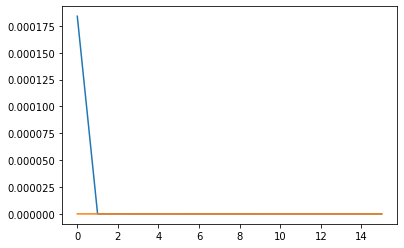

In [44]:
plot(jac_mean[:,0])
plot(dmu[:, 0])

In [9]:
ell

array([   0.     ,   72.00001,  144.00002,  216.     ,  288.00003,
        360.00003,  432.     ,  504.00003,  576.00006,  648.     ,
        720.00006,  792.00006,  864.     ,  936.00006, 1008.00006,
       1080.     ], dtype=float32)

In [35]:
dmu

DeviceArray([[0.0000000e+00, 0.0000000e+00],
             [3.3200369e-08, 3.0359676e-08],
             [2.0033104e-08, 1.3737297e-08],
             [1.2825879e-08, 8.4084713e-09],
             [9.0964267e-09, 6.0045853e-09],
             [6.9406565e-09, 4.6703490e-09],
             [5.5853464e-09, 3.8221146e-09],
             [4.6630060e-09, 3.2337870e-09],
             [3.9989878e-09, 2.7982059e-09],
             [3.4977057e-09, 2.4608622e-09],
             [3.1052390e-09, 2.1903952e-09],
             [2.7887239e-09, 1.9679145e-09],
             [2.5273486e-09, 1.7811838e-09],
             [2.3073106e-09, 1.6219712e-09],
             [2.1191320e-09, 1.4844821e-09],
             [1.9560951e-09, 1.3645138e-09]], dtype=float32)

In [50]:
jac_mean

DeviceArray([[ 1.8395732e-04, -1.6392265e-10],
             [ 3.3827060e-08,  3.3767577e-08],
             [ 2.4900860e-08,  1.4016590e-08],
             [ 1.2995082e-08,  8.2817015e-09],
             [ 9.6382280e-09,  4.2230446e-09],
             [ 7.5113791e-09,  2.8670997e-09],
             [ 5.8616525e-09,  1.5078805e-09],
             [ 5.0786362e-09,  7.8793189e-10],
             [ 4.0543182e-09,  4.3019238e-10],
             [ 3.5550147e-09, -3.2146442e-11],
             [ 2.7152998e-09,  2.2057345e-10],
             [ 2.7692095e-09, -9.4406080e-11],
             [ 2.1790401e-09,  7.3906388e-11],
             [ 2.1035660e-09, -1.7263156e-10],
             [ 2.0290480e-09, -1.8102482e-10],
             [ 1.9361259e-09, -2.4237709e-10]], dtype=float32)

In [45]:
jac_mean2=jac_mean[2:]
dmu2=dmu[2:]

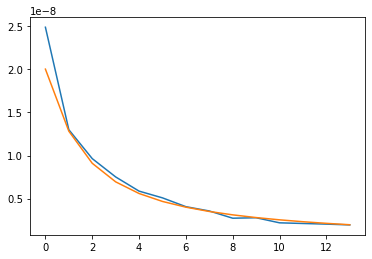

In [46]:
plot(jac_mean2[:,0])
plot(dmu2[:, 0])

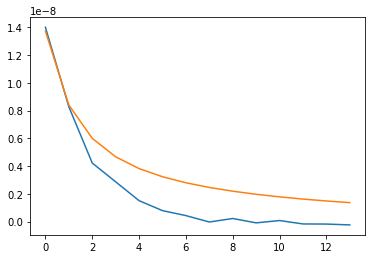

In [47]:
plot(jac_mean2[:,1])
plot(dmu2[:, 1])

Text(0.5, 1.0, 'Jacobian normalized by theory power spectrum')

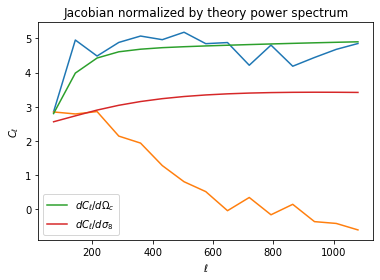

In [48]:

plot(ell, jac_mean[:,0]/mu)
plot(ell, jac_mean[:,1]/mu)
plot(ell, dmu[:,0]/mu,label=r'${d C_{\ell}}/{d \Omega_c}$')
plot(ell, dmu[:,1]/mu, label=r'${d C_{\ell}}/{d \sigma_8}$')
xlabel('$\ell$')
ylabel('$C_{\ell}$')
legend()
title('Jacobian normalized by theory power spectrum')
#savefig('psnorm_32.png',dpi=175)

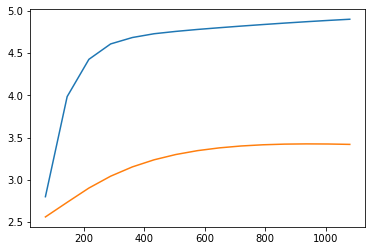

In [14]:
plot(ell, dmu[:,0]/mu,label=r'${d C_{\ell}}/{d \Omega_c}$')
plot(ell, dmu[:,1]/mu, label=r'${d C_{\ell}}/{d \sigma_8}$')

In [ ]:
F_1 = jc.sparse.dot(dmu.T, jc.sparse.inv(cov), dmu)
F= jc.sparse.dot(jac_mean.T, jc.sparse.inv(cov), jac_mean)


In [ ]:
ell_rede

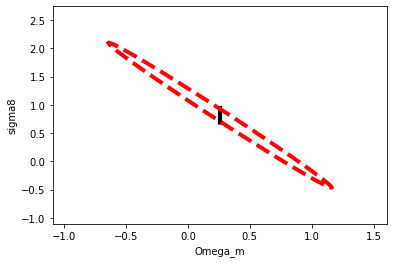

In [16]:
plot_contours(F, params, fill=False, color='black', lw=4);
plot_contours(F_1, params, fill=False, color='red', lw=4, linestyle='dashed');
xlabel('Omega_m')
ylabel('sigma8');